In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
path_train="/content/drive/My Drive/Colab_Notebooks/flight_train.csv"
path_test="/content/drive/My Drive/Colab_Notebooks/flight_test.csv"
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)

Printing the first 5 rows of Train & Test data

In [ ]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


Preprocessing Test data

In [ ]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


Finding the size of Train & Test data




In [ ]:
df_train.shape

(8012, 11)

In [ ]:
df_test.shape

(2671, 10)

Finding the missing values & visualizing them in train & test data

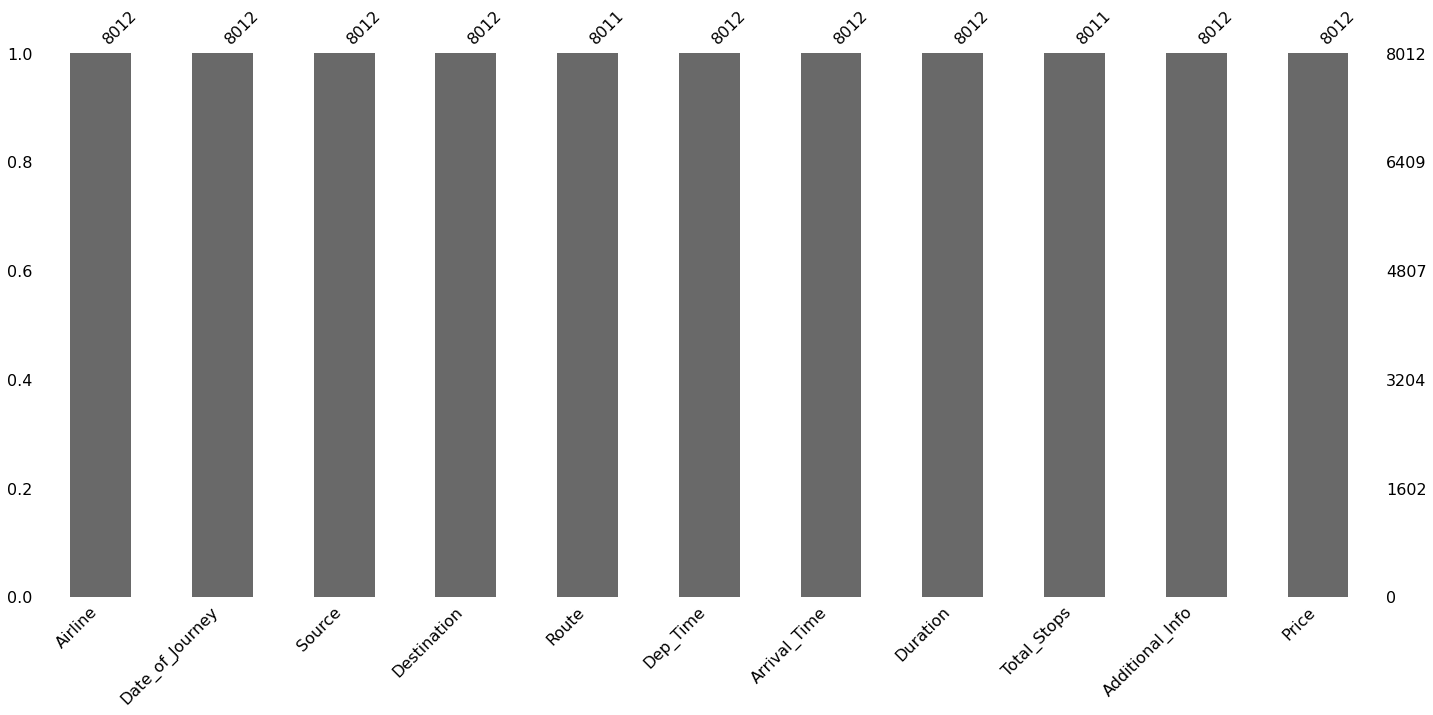

In [ ]:
df_train.isnull().sum()
msno.bar(df_train)

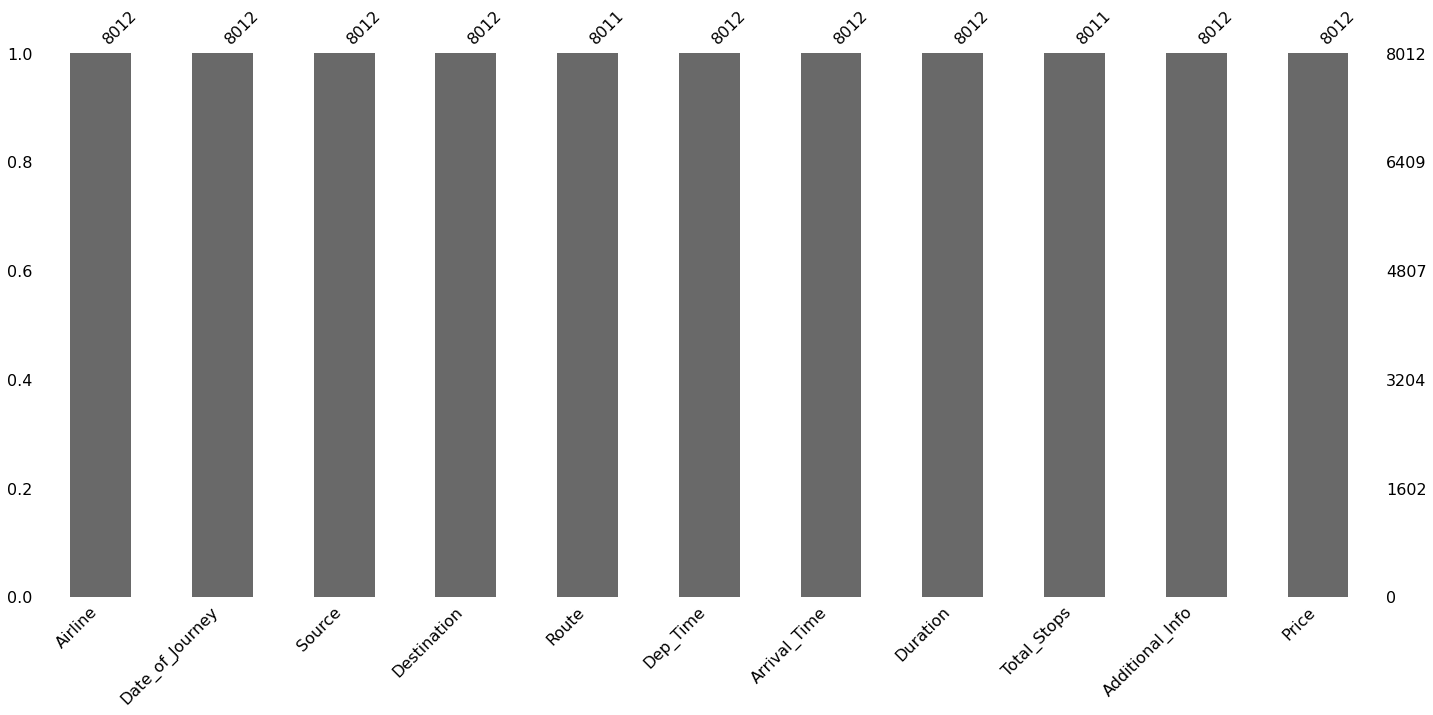

In [ ]:
df_test.isnull().sum()
msno.bar(df_train)

**Observations :**
There is only 2 missing values in training data set(1 in Route,1 in Total stops)
There are no missing values in test data set.

Dropping the null values in the train data set, as only 1 row has 2 missing values

In [ ]:
df_train.dropna(axis=0,inplace=True)
df_test.dropna(axis=0,inplace=True)

In [ ]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Size of the training data after dropping

In [ ]:
df_train.shape

(8011, 11)

Checking the type of datas

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8011 non-null   object
 1   Date_of_Journey  8011 non-null   object
 2   Source           8011 non-null   object
 3   Destination      8011 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8011 non-null   object
 6   Arrival_Time     8011 non-null   object
 7   Duration         8011 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8011 non-null   object
 10  Price            8011 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 751.0+ KB


In [ ]:
df_train.describe()

,Price
count,8011.000000
mean,9062.235426
std,4626.848090
min,1759.000000
25%,5277.000000
50%,8371.000000
75%,12373.000000
max,79512.000000


In [ ]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


Adding a new column by converting hours to seconds

In [ ]:
def duration(tym):
    print(tym)
    s=tym
    sp=s.split()
    if(len(sp)==2):
        hours= ''.join(filter(lambda i: i.isdigit(), sp[0]))
        minutes=''.join(filter(lambda i: i.isdigit(), sp[1]))
        hourtominutes=int(hours)*60+int(minutes)
    else:
        hours= ''.join(filter(lambda i: i.isdigit(), sp[0]))
        hourtominutes=int(hours)*60
    return hourtominutes

df_train['Duration'] = df_train['Duration'].map(duration)

Streaming output truncated to the last 5000 lines.
2h 55m
5h
2h 50m
7h 30m
23h 50m
13h 30m
17h 55m
8h 25m
8h 15m
5h 35m
17h 15m
2h 45m
16h 5m
5h
2h 50m
11h 40m
2h 40m
15h 25m
29h 50m
11h
14h 25m
5h 10m
26h 35m
6h 40m
10h 30m
12h 30m
2h 45m
2h 35m
13h 55m
16h
2h 20m
5h 45m
6h 25m
26h 20m
21h 10m
2h 30m
10h 40m
12h 30m
5h 30m
20h 55m
15h
13h 50m
25h 35m
13h 5m
13h 25m
26h 30m
9h
21h 25m
9h 15m
17h 5m
13h 25m
20h
2h 50m
24h 55m
11h 30m
19h 45m
2h 50m
13h 20m
3h 5m
14h 30m
1h 20m
23h 40m
13h 15m
10h 40m
8h 40m
1h 15m
2h 40m
7h 30m
2h 45m
25h 30m
12h 40m
24h
15h 30m
2h 15m
23h 40m
2h 30m
16h 55m
16h 50m
4h 40m
3h
2h 35m
2h 15m
25h 40m
17h 15m
16h 5m
2h 45m
12h 45m
5h 20m
6h 35m
20h
2h 20m
2h 40m
2h 55m
18h 10m
1h 25m
5h 40m
16h 50m
4h 15m
1h 30m
7h 15m
25h 5m
22h 10m
20h
5h 5m
3h
27h 10m
2h 55m
3h
2h 25m
12h 35m
1h 30m
2h 30m
6h 35m
3h
17h 15m
3h
1h 25m
18h 10m
5h 20m
12h 5m
7h 55m
8h 40m
5h 45m
6h 35m
12h 10m
2h 55m
8h 55m
8h 5m
18h 45m
5h
2h 15m
3h
8h 40m
2h 40m
10h 15m
8h 40m
8h 30m
8h 5

In [ ]:

df_train['Date_of_Journey'].replace('\n', '')

0       12/06/2019
1       18/06/2019
2       18/05/2019
3        6/05/2019
4        9/05/2019
           ...    
8007    12/06/2019
8008     9/06/2019
8009     3/03/2019
8010    18/05/2019
8011     9/05/2019
Name: Date_of_Journey, Length: 8011, dtype: object

In [ ]:

df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,765,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,185,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,925,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,735,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,330,1 stop,In-flight meal not included,9663


Univariate Analysis : Categorical column -Airline
There are more flights flying with Airline A, & least with Airline L

Text(0, 0.5, 'Counts')

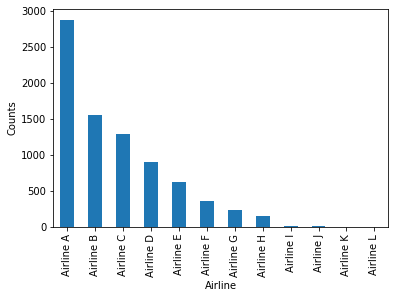

In [ ]:
df_train['Airline'].value_counts().plot(kind="bar")
plt.xlabel("Airline")
plt.ylabel("Counts") 

Date of Journey for the given data is between March 2019 to June 2019.

Text(0, 0.5, 'Demand/counts')

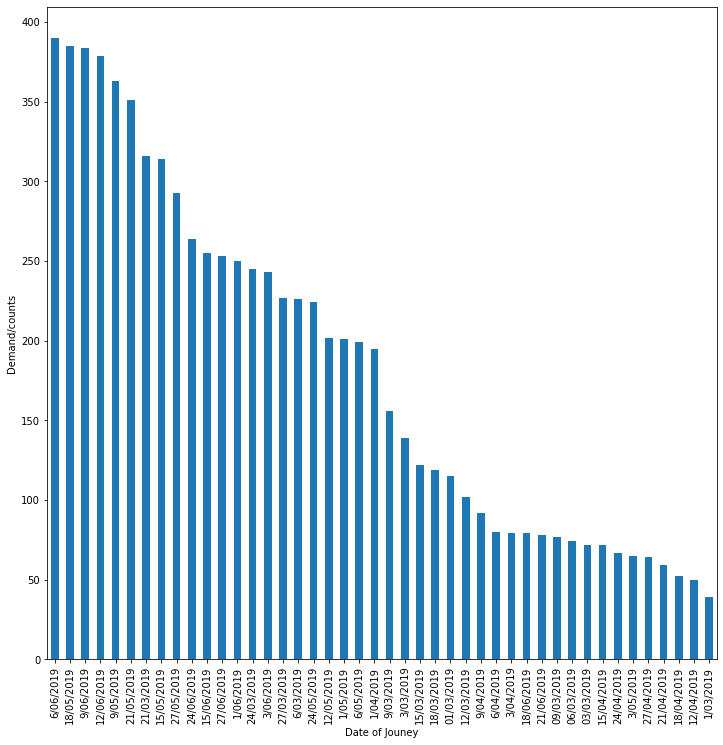

In [ ]:
df_train['Date_of_Journey'].value_counts().plot(kind="bar",figsize=(12,12))
plt.xlabel("Date of Jouney")
plt.ylabel("Demand/counts") 

([<matplotlib.patches.Wedge at 0x7fded72589e8>,
 [Text(0.2836451081608391, 1.1659954770994725, 'Delhi'),
  Text(-1.02687917326421, -0.3943591808443321, 'Kolkata'),
  Text(0.3112413897544659, -1.0550491918880887, 'Banglore'),
  Text(0.9990500615982146, -0.4603248574871922, 'Mumbai'),
  Text(1.1923014714303057, -0.13570998940803192, 'Chennai')])

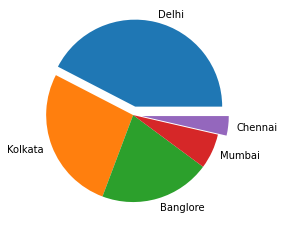

In [ ]:
plt.pie(df_train["Source"].value_counts(),labels=["Delhi","Kolkata","Banglore","Mumbai","Chennai"],explode=(0.1, 0, 0, 0,0.1) )

Observation : Most of the flights source from Delhi. The less flights are from chennai


Find the value counts of the destination. We observe that data clean up has to be done for the similar values "New delhi" & "Delhi"


In [ ]:
df_train["Destination"].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

Observation : 
Cleaning up the desination value.
Changing the Values from "New delhi" to "Delhi" in both training & test data

In [ ]:
df_train['Destination'] = df_train['Destination'].replace(['New Delhi'],'Delhi')
df_test['Destination'] = df_test['Destination'].replace(['New Delhi'],'Delhi')

([<matplotlib.patches.Wedge at 0x7fded71ab780>,
 [Text(0.2836451081608391, 1.1659954770994725, 'Cochin'),
  Text(-1.02687917326421, -0.3943591808443321, 'Banglore'),
  Text(0.3112413897544659, -1.0550491918880887, 'Delhi'),
  Text(0.9990500615982146, -0.4603248574871922, 'Hyderabad'),
  Text(1.1923014714303057, -0.13570998940803192, 'Kolkata')])

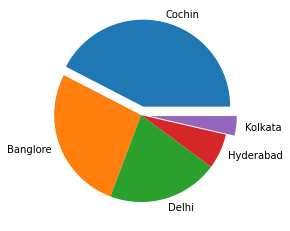

In [ ]:
plt.pie(df_train["Destination"].value_counts(),labels=["Cochin","Banglore","Delhi","Hyderabad","Kolkata"],explode=(0.1, 0, 0, 0,0.1) )

Observation : There are more traveller to cochin, Kolkata being the least

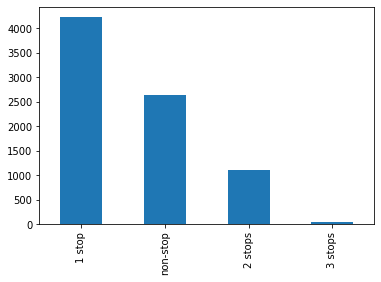

In [ ]:
df_train["Total_Stops"].value_counts().plot(kind="bar")

Bivariate Analysis
Finding distribution of price against duration in minutes

In [ ]:
sns.pairplot(df_train,vars = ['Duration', 'Price'])


NameError: ignored

Converting date to day of the week:
The price would differ based on whether it is weekend, or a weekday for the same route and duration. Therefore, it is important to find out the day of the week for each flight date.

The price is not linearly correlated with the duration. This means, there is some other factor which is determining the price. It may be the day of the week.

In [ ]:
# Converting all dates to standard format
df_train['Day_of_Week'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y')

#Identifying the day of the week
df_train['Day_of_Week'] = df_train['Day_of_Week'].dt.day_name()

In [ ]:
df_train.head()

In [ ]:
df_train["Additional_Info"].value_counts()

Observation : Most of the rows do have have additional information

In [ ]:
from datetime import datetime
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'].str.strip(),errors='coerce').dt.strftime('%H:%M')
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'].str.strip(),errors='coerce').dt.strftime('%H:%M')


In [ ]:
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'].str.strip(),errors='coerce').dt.strftime('%H:%M')
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'].str.strip(),errors='coerce').dt.strftime('%H:%M')

In [ ]:
df_train.dtypes

In [ ]:
df_train.head()

In [ ]:
df_train["Route"].value_counts()

Observation : Maximum airlines fly though the route DEL → BOM → COK 

In [ ]:
Max_price =df_train["Price"].max()
Min_price=df_train["Price"].min()
print(Max_price)
print(Min_price)
median_price=df_train["Price"].median()
print(median_price)

Finding the average price for the airline based on the destination

In [ ]:
ng_grouped = df_train.groupby(['Airline', 'Destination'])['Price']
ng = ng_grouped.median()
ng

From the above we can see the median prices of each Destination with for all the airlines

Finding the average price for the airline based on the Total stops

In [ ]:
Stops_grouped = df_train.groupby(['Airline', 'Total_Stops'])['Price']
stop = Stops_grouped.median()
stop

In [ ]:
stop.plot(kind="bar",figsize=(12,12))

Observation :
Price is the highest for the Airline J with 1 & 2 stops

In [ ]:
Additional_grouped = df_train.groupby(['Airline', 'Additional_Info'])['Price']
Add = Additional_grouped.median()
Add

In [ ]:
Add.plot(kind="bar",figsize=(10,10))

In [ ]:
No_bag=df_train[df_train["Additional_Info"]=="Business class"]
print(No_bag)

Based on the the givin additonal info we can see that the business class is offered in Airline J, the Source & the destination is the same with 1 stop. Hence they are highly priced

In [ ]:
Desti=df_train[df_train["Destination"]=="Banglore"]
price_blore=Desti.groupby("Airline")["Price"].mean()
price_blore

In [ ]:
price_blore.plot(kind="bar")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Chart showing the cost for various airlines for the Banglore destination")

Top 10 expensive Airlines

We can observe from the above chart that for banglore destination average price for Airline G is the cheapest, Airline A being the highest

In [ ]:
df_train.sort_values('Price',ascending=False).head(10)

From the above we can see that the top3 expesive are Airline J ,Business class, with early morning departure.In the top 10 expensive prices are mostly from the source Banglore & destination delhi

Finding out the details for the 10 cheapest airline details 

In [ ]:
df_train[["Airline","Source","Destination","Duration","Total_Stops","Price"]].sort_values('Price',ascending=True).head(10)

From the above we observe that the most of the cheapest airlines are from Airline E. Top 10 cheapest flights are the ones that fly between Mumbai to Hyderabad. These flights are non stop

Finding the average price of each airline for date of journey later from June to dec

In [ ]:
month_great=df_train[df_train["Date_of_Journey"]>"2019-06-01"]
month_price=month_great.groupby("Airline")["Price"].mean()
month_price

In [ ]:
month_price.plot(kind='bar')
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Chart showing the cost for various airlines during the second half of the year")

In [ ]:
month_lesser=df_train[df_train["Date_of_Journey"]<"2019-06-01"]
month_price=month_lesser.groupby("Airline")["Price"].mean()
month_price
month_price.plot(kind='bar')
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Chart showing the cost for various airlines during the first half of the year")

From the above observation we can see that during the first haf & the second half of the year Airline J is the most expensive,Airline L id less expensive in the second half of the year.There is not much differences in the Airlines cost in the first half & seconf half

Cheapest airlines for the night departures

In [ ]:
dep_time=df_train[df_train["Dep_Time"]>"20:00"].sort_values('Price',ascending=False).head(10)
print(dep_time)


In [ ]:
Night_flight=df_train[df_train["Dep_Time"]>"20:00"]
Night_flight_counts=Night_flight["Airline"].value_counts()

In [ ]:
Night_flight_counts.plot(kind="bar")
plt.xlabel("Airline")
plt.ylabel("Counts")
plt.title("Chart showing the number of flights each airline operates during night")

From the above chart we can observe theet Airline A operated more flights during night compared to other lines. There are least number of flights flying during night for Airline J

Finding out which month has the highest number of flights/travellers

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(y=df_train['Airline'],x=df_train['Date_of_Journey'],s=50)
plt.xlabel('Month of journey',size=20)
plt.ylabel('Airline',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

From the above chart we can see that the number of flights are mor beterrn March to june, which is the holiday season, there are lot of travelors travellering during this time

Finding out which month has the most prefeered destination & least prefered destination according to the months

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(y=df_train['Destination'],x=df_train['Date_of_Journey'],s=50)
plt.xlabel('Month of journey',size=20)
plt.ylabel('Destination',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

From the above observation we can see that during May to june cochin is the most preferred destination to travel,Non peak travel to cochin is from sept to dec or between Jan to march. Cochin , delhi followed by banglore

Finding out the source of flight & their peak period

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(y=df_train['Source'],x=df_train['Date_of_Journey'],s=50)
plt.xlabel('Month of journey',size=20)
plt.ylabel('Source',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

From the above we can observe that there are more traveller suring the month March to june.Most of the flights/travellers are from delhi, Banglore follwed by kolkatta

MACHINE LEARNING

In [ ]:
df_train.head()

Changing the categorical variable to numeric values for both train & test data using label encoder

In [ ]:
cat_feature = df_train.select_dtypes(include = "object").columns
print(cat_feature)
#Label Encoding 'for object' to numeric conversion

LE_var = LabelEncoder()

for col in cat_feature:
    
    df_train[col] = LE_var.fit_transform(df_train[col].astype(str))
print (df_train.info())

In [ ]:
df_test['Date_of_Journey']
import datetime
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey']).dt.strftime('%m/%d/%Y')
df_test.head()
import datetime
df_test['Duration']=(pd.to_timedelta(df_test.Duration.str.replace('mins', 'min')).dt.total_seconds()//60).astype(int)
df_test.head()
df_test['Day_of_Week'] = pd.to_datetime(df_test['Date_of_Journey'], format='%m/%d/%Y')
df_test['Day_of_Week'] = df_test['Day_of_Week'].dt.day_name()

#Label Encoding 'for object' to numeric conversion

LE_var = LabelEncoder()

for col in cat_feature:
    df_test[col] = LE_var.fit_transform(df_test[col].astype(str))
print (df_test.info())


Checking the data types of the train data

In [ ]:
df_train.head()

In [ ]:
df_test.head()

Changing the duration to minutes : 

In [ ]:
#def duration(tym):
 #   print(tym)
  #  s=tym
   # sp=s.split()
    #if(len(sp)==2):
     #   hours= ''.join(filter(lambda i: i.isdigit(), sp[0]))
      #  minutes=''.join(filter(lambda i: i.isdigit(), sp[1]))
       # hourtominutes=int(hours)*60+int(minutes)
    #else:
     #   hours= ''.join(filter(lambda i: i.isdigit(), sp[0]))
      #  hourtominutes=int(hours)*60
    #return hourtominutes

#df_train['Duration'] = df_train['Duration'].map(duration)
#df_test['Duration'] = df_test['Duration'].map(duration)

In [ ]:
#print(df_train['Duration'].quantile(0.10))
#print(df_train['Duration'].quantile(0.90))
#df_train["Duration"] = np.where(df_train["Duration"] <145.0, 145.0,df_train['Duration'])
#df_train["Duration"] = np.where(df_train["Duration"] >1445.0, 1445.0,df_train['Duration'])
#print(df_train['Duration'].skew())

In [ ]:
#sns.boxplot(df_train.Duration)

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
import seaborn as sns
corr = df_train.corr()
print(corr)
sns.heatmap(corr)

We can see that there is no correlation between any of the variables

Splitting into train & test data

In [ ]:
X = df_train.drop(["Price","Additional_Info"],1)
y = df_train["Price"].copy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
#X_train.head()
#X_test.head()
X.dtypes

1) Linear Regression

In [ ]:
 from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

predictions = LR.predict(X_test)
print(predictions)

2)Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
predictions = rf.predict(X_test)
print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))


Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)

print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))

XGB Regressor

In [ ]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))

Random Forest Regressor displayed a low 'rmse' score compared to other regression models. hence it is used for predicting the test dataset 'price

In [ ]:
y_pred_test = rf.predict(df_test)

In [ ]:
y_pred_test

In [ ]:
submissions_f = pd.DataFrame(y_pred_test,columns = ['price'])
print(submissions_f)

In [ ]:
submissions_f.to_csv("/content/drive/My Drive/Colab_Notebooks/flight_sample_submission.csv")